## Relevant libraries

In [195]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [196]:
data = pd.read_csv('1.04. Real-life example.csv')

In [197]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [198]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [200]:
data.isnull().sum()


#checking whether there are null values or not

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [201]:
df = data.drop(['Model'], axis=1)
df

#Model is categorical variable and it will not be useful for our research

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014


In [202]:
df = df.dropna(axis=0)


#let's drop null values

In [203]:
df.isnull().sum()

#checking nulls

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Data exploring

<AxesSubplot:xlabel='Price', ylabel='Density'>

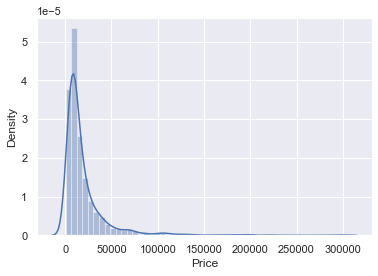

In [204]:
sns.distplot(df['Price'])

## Outliers

In [205]:
a = df['Price'].quantile(0.85)

In [206]:
new_df = df[df['Price'] < a]
new_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3419,3419.00,3419,3419.00,3419.00,3419,3419,3419.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,827,NaN,1384,NaN,NaN,1522,3048,NaN
mean,NaN,11570.83,NaN,182.38,2.66,NaN,NaN,2005.21
std,NaN,7207.91,NaN,96.49,5.33,NaN,NaN,6.47
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1978.00
25%,NaN,6400.00,NaN,118.00,1.80,NaN,NaN,2001.00
50%,NaN,9900.00,NaN,176.00,2.00,NaN,NaN,2007.00
75%,NaN,15500.00,NaN,245.00,2.60,NaN,NaN,2010.00


<AxesSubplot:xlabel='Price', ylabel='Density'>

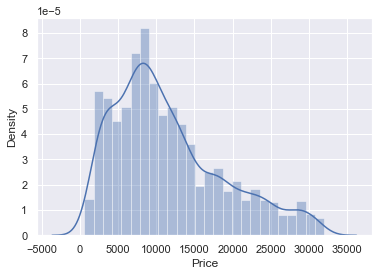

In [207]:
sns.distplot(new_df['Price'])

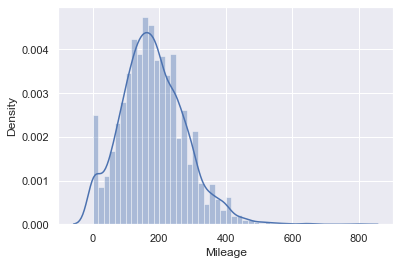

In [208]:
sns.distplot(new_df['Mileage'])
q = new_df['Mileage'].quantile(0.99)
new1_df = new_df[new_df['Mileage']<q]


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

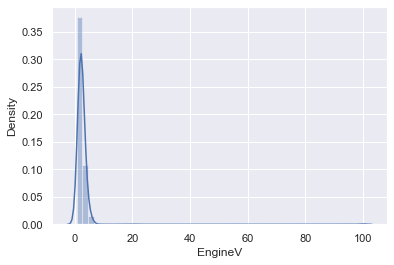

In [209]:
sns.distplot(new1_df['EngineV'])


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

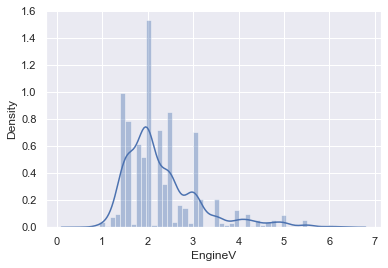

In [210]:
new2_df = new1_df[new_df['EngineV'] < 6.5]

sns.distplot(new2_df['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

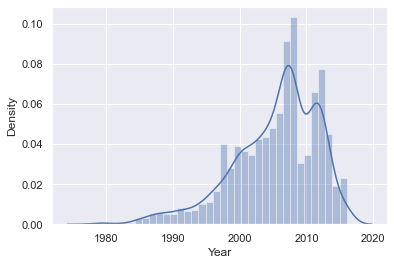

In [211]:
sns.distplot(new2_df['Year'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

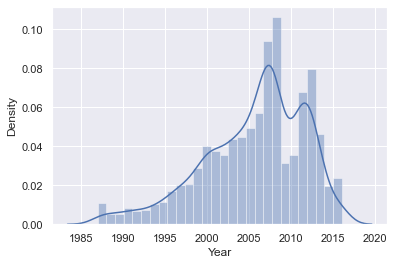

In [212]:
b = new2_df['Year'].quantile(0.01)
new3_df = new2_df[new1_df['Year']>b]

sns.distplot(new3_df['Year'])

In [213]:
last_data = new3_df.reset_index(drop=True)

In [214]:
last_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3325,3325.00,3325,3325.00,3325.00,3325,3325,3325.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,800,NaN,1335,NaN,NaN,1478,2963,NaN
mean,NaN,11757.08,NaN,178.60,2.32,NaN,NaN,2005.55
std,NaN,7191.52,NaN,90.20,0.84,NaN,NaN,6.03
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1987.00
25%,NaN,6500.00,NaN,117.00,1.80,NaN,NaN,2002.00
50%,NaN,9999.00,NaN,175.00,2.00,NaN,NaN,2007.00
75%,NaN,15800.00,NaN,240.00,2.50,NaN,NaN,2010.00


## Checking OLS assumptions

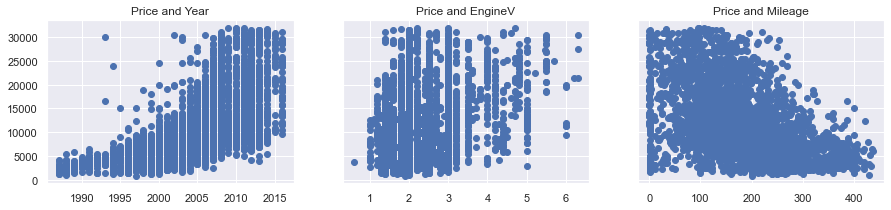

In [215]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey= True, figsize=(15,3))
ax1.scatter(last_data['Year'], last_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(last_data['EngineV'], last_data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(last_data['Mileage'], last_data['Price'])
ax3.set_title('Price and Mileage')


plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

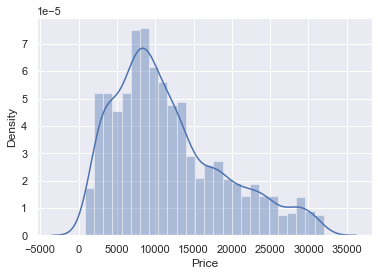

In [216]:
sns.distplot(last_data['Price'])

## Relaxing assumptions

In [217]:
log_price = np.log(last_data['Price'])
last_data['log_price'] = log_price
last_data


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3320,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3321,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3322,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3323,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


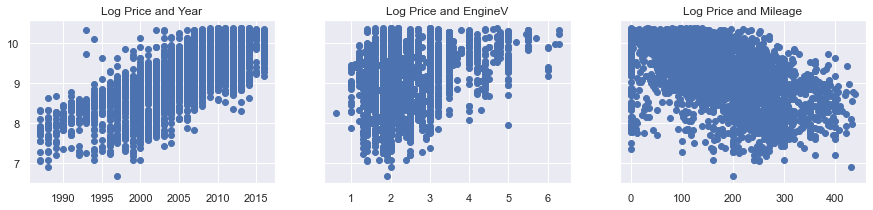

In [218]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey= True, figsize=(15,3))
ax1.scatter(last_data['Year'], last_data['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(last_data['EngineV'], last_data['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(last_data['Mileage'], last_data['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [219]:
last_data = last_data.drop(['Price'], axis=1)

## Multicollinearity 

In [220]:
last_data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = last_data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [222]:
vif

,VIF,features
0,5.05,Mileage
1,10.79,Year
2,8.80,EngineV


## Creating dummy variables

In [223]:
data_with_dummies = pd.get_dummies(last_data, drop_first = True)

In [224]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,1991,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,1999,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,2003,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,2007,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,2011,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [225]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [226]:
cols = ['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [227]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,1991,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,1999,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,2003,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,2007,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,2011,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Modelling

In [228]:
## Inputs and Target

target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [229]:
# Data scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [230]:
inputs_scaled = scaler.transform(inputs)

In [231]:
# Train and Test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state = 365)

## Regression

In [232]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [233]:
y_hat = reg.predict(x_train)

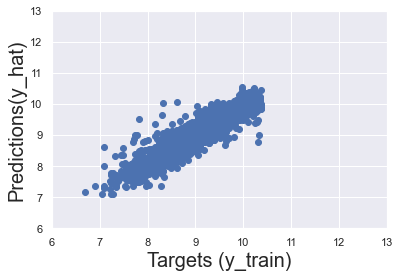

In [234]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 20)
plt.ylabel('Predictions(y_hat)', size = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residiuals PDF')

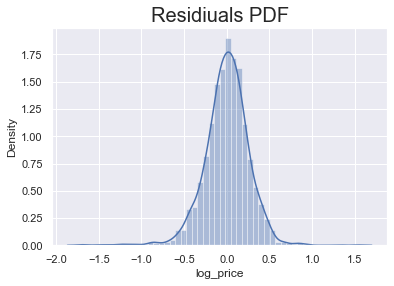

In [235]:
# Residiual check

sns.distplot(y_train - y_hat)
plt.title('Residiuals PDF', size=20)

In [236]:
reg.score(x_train,y_train)

0.8592407947564671

In [237]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.03
1,EngineV,0.16
2,Year,0.47
3,Brand_BMW,0.01
4,Brand_Mercedes-Benz,-0.01
5,Brand_Mitsubishi,-0.11
6,Brand_Renault,-0.18
7,Brand_Toyota,-0.04
8,Brand_Volkswagen,-0.08
9,Body_hatch,-0.10


In [238]:
last_data['Brand'].unique()

# Which brand is not shown in the summary section, it means this brand is a benchmark or central point (Audi = 1).
# And values which are positive it means (BMW) more expensive than Audi
# Negative ones cheaper than Audi because Audi is 1.

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [239]:
y_hat_test = reg.predict(x_test)

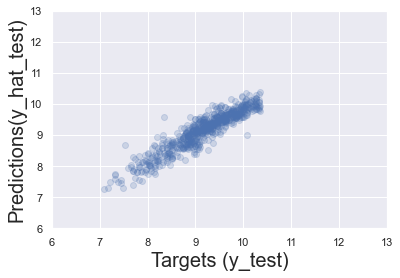

In [240]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)  #alpha resembles opacity
plt.xlabel('Targets (y_test)', size = 20)
plt.ylabel('Predictions(y_hat_test)', size = 20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [241]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,11471.39
1,22165.55
2,12952.07
3,11198.89
4,4433.99


In [242]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Prediction,Target
0,11471.39,NaN
1,22165.55,7900.00
2,12952.07,NaN
3,11198.89,NaN
4,4433.99,NaN


In [243]:
# We need to reset index original indexes:

y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.27
1   10.02
2    9.28
3    9.45
4    8.50
Name: log_price, dtype: float64

In [244]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,11471.39,10600.00
1,22165.55,22500.00
2,12952.07,10700.00
3,11198.89,12750.00
4,4433.99,4900.00
5,3004.21,3500.00
6,13016.21,13500.00
7,12631.32,14999.00
8,16354.17,16800.00
9,10268.27,9000.00


In [245]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [246]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,11471.39,10600.00,-871.39,8.22
1,22165.55,22500.00,334.45,1.49
2,12952.07,10700.00,-2252.07,21.05
3,11198.89,12750.00,1551.11,12.17
4,4433.99,4900.00,466.01,9.51
5,3004.21,3500.00,495.79,14.17
6,13016.21,13500.00,483.79,3.58
7,12631.32,14999.00,2367.68,15.79
8,16354.17,16800.00,445.83,2.65
9,10268.27,9000.00,-1268.27,14.09


In [247]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,665.00,665.00,665.00,665.00
mean,11225.49,11663.64,438.16,19.75
std,6023.08,7100.04,3101.41,20.16
min,1426.49,1185.60,-10323.62,0.02
25%,6310.00,6600.00,-1080.16,7.10
50%,10383.41,9900.00,94.84,15.53
75%,14969.78,15500.00,1738.82,26.65
max,32100.06,31500.00,15893.36,245.80


In [248]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x) #To show only two digits after dot 
df_pf.sort_values(by='Difference%')

,Prediction,Target,Residual,Difference%
93,4299.01,4300.00,0.99,0.02
429,17336.12,17300.00,-36.12,0.21
258,13288.78,13250.00,-38.78,0.29
428,12955.87,13000.00,44.13,0.34
487,21377.59,21300.00,-77.59,0.36
519,9939.06,9900.00,-39.06,0.39
325,9411.99,9450.00,38.01,0.40
438,15785.28,15850.00,64.72,0.41
544,3112.95,3100.00,-12.95,0.42
657,4478.64,4500.00,21.36,0.47
